# Gem Data Pre-Processing Workflow

### Installing the gemlog software
Follow the gemlog [installation procedure](https://github.com/ajakef/gemlog/blob/main/Installation.md).



### Getting Started
First, download the zip file in the list of files above; this contains the inputs for this demonstration. Move the file to some convenient folder, unzip it, and cd into the project folder.

Notice the structure of this project folder. It includes a “raw” folder where the gem data files go. You don't have to use the folder name “raw”--or even have a separate folder for the raw data files--but all the default settings assume you're doing it this way.
```
Project_Folder/
|__station_info.txt (table of SEED codes vs Gem serial number)
|__raw/ (raw data from all loggers, FROM THIS PROJECT ONLY)
```

This example includes six two-hour files from six data loggers.
```
$ ls raw
FILE0010.096
FILE0010.103
FILE0010.109
FILE0011.088
FILE0011.106
FILE0012.077
```
Gem data files have the Gem's serial number as the extension, meaning that we have data from Gems 077, 088, 096, 103, 106, and 109. Empty or nearly-empty data files (like those from quick tests between field campaigns) can cause problems in the data conversion. It's a good idea to start each field campaign with clean disks, and to inspect your raw files and remove bad files before converting them.

The optional file `station info.txt` is used to assign [SEED codes](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed/) (network, station, and location) to your output data. By default, your converted data will use the Gem serial number as the station name, and leave the network and location codes blank. If you want to assign different names, you need to include a comma-separated text file containing a table of serial numbers, network codes, station codes, and location codes. Because all Gem recordings are infrasound sampled at 100 Hz, they are automatically assigned the [channel code](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed-channel-naming/) HDF.


### Getting Started
First, download the zip file in the list of files above; this contains the inputs for this demonstration. Unzip it to reveal the "project folder" (in this case, named `demo`), which contains all the raw and derived data for this project.

In [1]:
!unzip -o demo.zip
!ls

Archive:  demo.zip
  inflating: demo/station_info.txt   
  inflating: demo/.ipynb_checkpoints/demo_workflow-checkpoint.ipynb  
  inflating: demo/raw/FILE0010.096   
  inflating: demo/raw/FILE0010.103   
  inflating: demo/raw/FILE0010.109   
  inflating: demo/raw/FILE0012.077   
  inflating: demo/raw/FILE0011.106   
  inflating: demo/raw/FILE0011.088   
demo  demo_workflow.ipynb  demo.zip  README.md


Now, cd into the project folder and examine its contents.

In [2]:
%cd demo
!pwd
!ls

/home/jake/Work/gemlog_python/demo/demo
/home/jake/Work/gemlog_python/demo/demo
gemconvert_logfile.txt	raw  station_info.txt


Notice the structure of this project folder. It includes a “raw” folder where the gem data files go. You don't have to use the folder name “raw”--or even have a separate folder for the raw data files--but all the default settings assume you're doing it this way.
```
Project_Folder/
|__raw/ (raw data from all loggers, FROM THIS PROJECT ONLY)
|__station_info.txt (table of SEED codes vs Gem serial number)
```

This example includes six two-hour files from six data loggers.
```
 ls raw
FILE0010.096
FILE0010.103
FILE0010.109
FILE0011.088
FILE0011.106
FILE0012.077
```

Gem data files have the Gem's serial number as the extension, meaning that we have data from Gems 077, 088, 096, 103, 106, and 109. Empty or nearly-empty data files (like those from quick tests between field campaigns) can cause problems in the data conversion. It's a good idea to start each field campaign with clean disks, and to inspect your raw files and remove bad files before converting them.

The optional file `station info.txt` is used to assign [SEED codes](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed/) (network, station, and location) to your output data. By default, your converted data will use the Gem serial number as the station name, and leave the network and location codes blank. If you want to assign different names, you need to include a comma-separated text file containing a table of serial numbers, network codes, station codes, and location codes. Because all Gem recordings are infrasound sampled at 100 Hz, they are automatically assigned the [channel code](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed-channel-naming/) HDF.

### Converting raw gem data
Set your conda environment to whatever you set up during the installation using a terminal command like `conda activate gem` and run the data conversion using the terminal command `gemconvert`. This may take a while to run if you have a lot of data! 

In [3]:
!gemconvert
!ls

gemlog version 1.6.5
inputdir  raw
serial numbers  ['077', '088', '096', '103', '106', '109']
outputdir  mseed
File 1 of 1: raw/FILE0012.077
.077..HDF | 2020-05-10T11:35:40.000000Z - 2020-05-10T13:35:39.220000Z | 100.0 Hz, 719923 samples
077 done
File 1 of 1: raw/FILE0011.088
.088..HDF | 2020-05-10T11:24:07.000000Z - 2020-05-10T13:24:06.880000Z | 100.0 Hz, 719989 samples
088 done
File 1 of 1: raw/FILE0010.096
.096..HDF | 2020-05-10T11:50:43.000000Z - 2020-05-10T13:50:43.080000Z | 100.0 Hz, 720009 samples
096 done
File 1 of 1: raw/FILE0010.103
.103..HDF | 2020-05-10T11:08:43.000000Z - 2020-05-10T13:08:42.530000Z | 100.0 Hz, 719954 samples
103 done
File 1 of 1: raw/FILE0011.106
.106..HDF | 2020-05-10T11:38:38.000000Z - 2020-05-10T13:38:37.640000Z | 100.0 Hz, 719965 samples
106 done
File 1 of 1: raw/FILE0010.109
.109..HDF | 2020-05-10T11:43:03.000000Z - 2020-05-10T13:43:02.700000Z | 100.0 Hz, 719971 samples
109 done
gemconvert_logfile.txt	gps  metadata  mseed  raw  station_info.txt


`gemconvert` should add the following folders to your directory structure:
```
Project_Folder/
|__gemconvert_logfile.txt (NEW: contains a record of the conversion process and any messages)
|__gps/ (NEW: contains gps logs)
|__metadata/ (NEW: contains csv files with state-of-health data)
|__mseed/ (NEW: contains hour-long miniSEED waveform files)
|__raw/ (unchanged)
|__station_info.txt (unchanged, and unused in this step)
```

##### Multiple conversion attempts
If the conversion is run multiple times, `gemconvert` will overwrite pre-existing miniSEED files. However, gps and metadata files are tagged with a conversion number at the end of their file name, so they are not overwritten. For a given Gem serial number, the file with the highest conversion number was created most recently. `gemconvert_logfile.txt `is appended to on each conversion attempt, so it is also not overwritten.


### Inspect the Data
The following workflow can be used to read the mseed data and deconvolve the instrument response.
Because wind noise is severe at lower frequencies, it is generally necessary to apply a high-pass filter to obtain good data; 1 Hz is a good corner frequency to start with. Obspy's plot functions do not handle long plotting periods well; a program like PASSCAL's PQL is probably better for perusing the data.


6 Trace(s) in Stream:
.103..HDF | 2020-05-10T11:08:43.000000Z - 2020-05-10T13:08:42.530000Z | 100.0 Hz, 719954 samples
.088..HDF | 2020-05-10T11:24:07.000000Z - 2020-05-10T13:24:06.880000Z | 100.0 Hz, 719989 samples
.077..HDF | 2020-05-10T11:35:40.000000Z - 2020-05-10T13:35:39.220000Z | 100.0 Hz, 719923 samples
.106..HDF | 2020-05-10T11:38:38.000000Z - 2020-05-10T13:38:37.640000Z | 100.0 Hz, 719965 samples
.109..HDF | 2020-05-10T11:43:03.000000Z - 2020-05-10T13:43:02.700000Z | 100.0 Hz, 719971 samples
.096..HDF | 2020-05-10T11:50:43.000000Z - 2020-05-10T13:50:43.080000Z | 100.0 Hz, 720009 samples
6 Trace(s) in Stream:
.077..HDF | 2020-05-10T11:35:40.000000Z - 2020-05-10T13:35:39.220000Z | 100.0 Hz, 719923 samples
.088..HDF | 2020-05-10T11:24:07.000000Z - 2020-05-10T13:24:06.880000Z | 100.0 Hz, 719989 samples
.096..HDF | 2020-05-10T11:50:43.000000Z - 2020-05-10T13:50:43.080000Z | 100.0 Hz, 720009 samples
.103..HDF | 2020-05-10T11:08:43.000000Z - 2020-05-10T13:08:42.530000Z | 100.0 Hz, 7

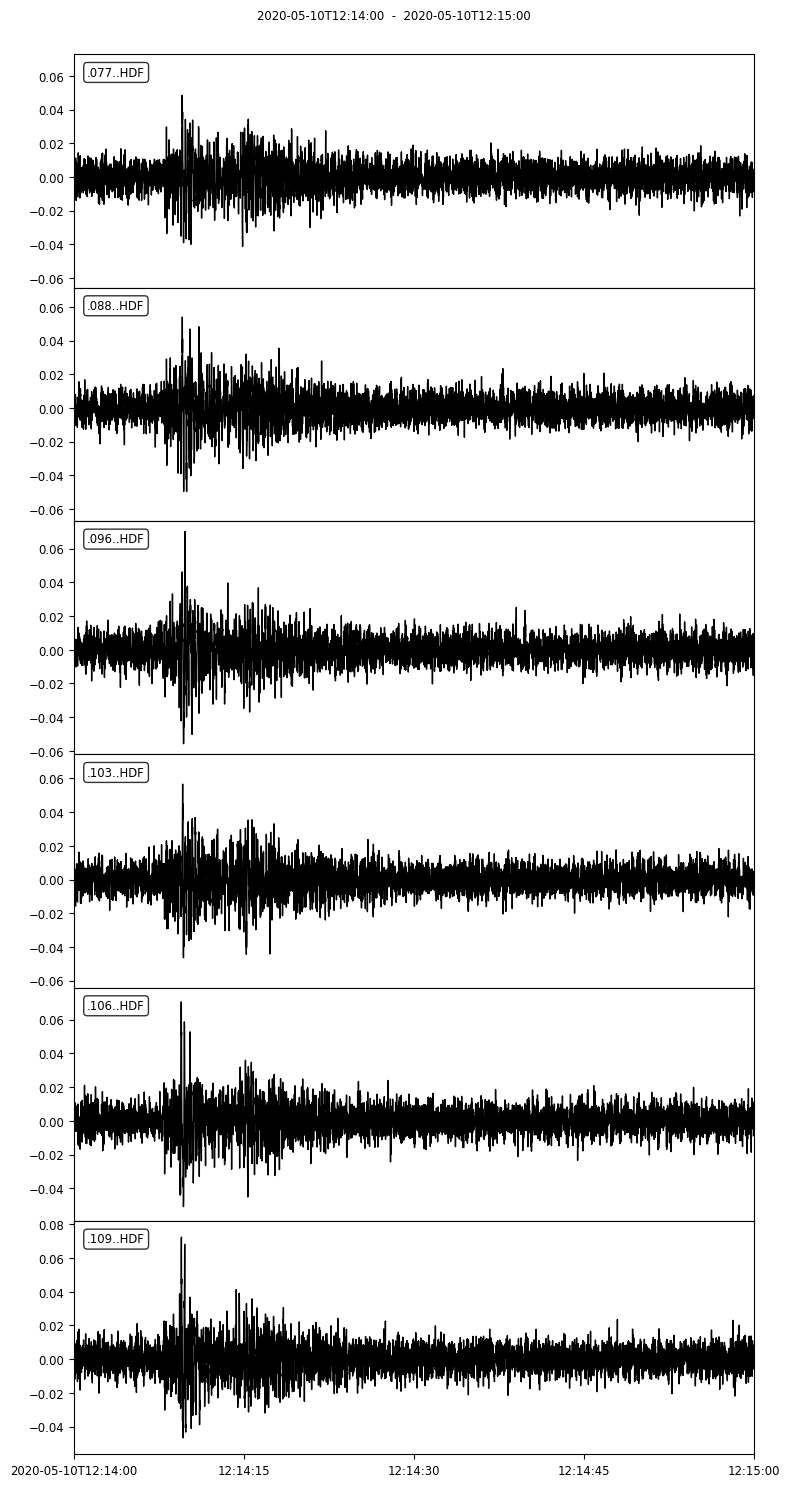

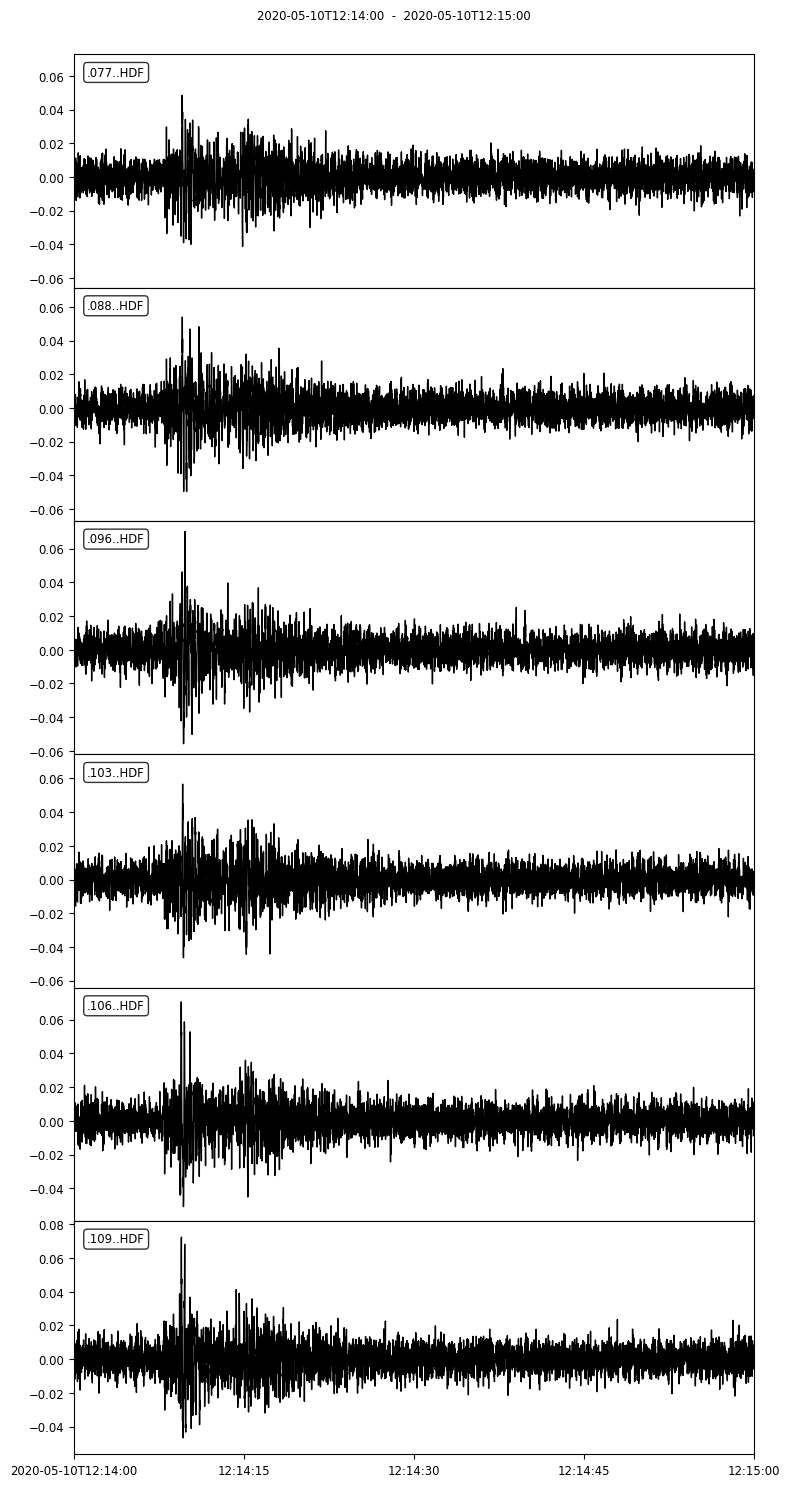

In [4]:
import obspy, gemlog

## read the data
data = obspy.read('mseed/*')
print(data)

## combine traces so that each station has one trace
data.merge()
print(data)

## deconvolve the instrument response
## if you used a config file to set the Gem's gain to low, change the gain setting below
data = gemlog.deconvolve_gem_response(data, gain='high') 

## filter data above 1 Hz (lower frequencies are often wind noise)
data.filter("highpass", freq=1.0)

## trim the data around a known event
t1 = obspy.UTCDateTime('2020-05-10T12:14:00')
t2 = obspy.UTCDateTime('2020-05-10T12:15:00')
data.trim(t1, t2)

## plot the results
data.plot()


### Organizing the data
If your dataset is from an array or network, you probably want to create a station map and assign network, station, and location codes to your miniSEED files. You can do this using python functions from gemlog. Before starting python, you need a csv file assigning Gem serial numbers to network, station, and location codes.

In this example, `station_info.txt` describes a network (NM) containing two arrays (LADR and MANZ), each containing three stations; each of the six Gem serial numbers is assigned to a network and station. We follow the convention that location codes are to be used for different sub-sites belonging to a single data logger, meaning that each Gem counts as its own station and does not receive a location code (hence the blanks after the last commas in each line). For more information on SEED codes, see [this IRIS page](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed/).

```cat station_info.txt
SN,Network,Station,Location
077,NM,LADR1,
088,NM,LADR2,
103,NM,LADR3,
096,NM,MANZ1,
109,NM,MANZ2,
106,NM,MANZ3,
```

Begin by activating your conda environment as before: `conda activate gem` and open python within your project directory. Run the following code:


In [5]:
!cat station_info.txt
import gemlog
coords = gemlog.summarize_gps('gps', station_info = 'station_info.txt', output_file = 'project_coords.csv')
gemlog.rename_files('mseed/*', station_info = 'station_info.txt', output_dir = 'renamed_mseed')


SN,Network,Station,Location
077,NM,LADR1,
088,NM,LADR2,
103,NM,LADR3,
096,NM,MANZ1,
109,NM,MANZ2,
106,NM,MANZ3,
1 of 6: 077
2 of 6: 088
3 of 6: 096
4 of 6: 103
5 of 6: 106
6 of 6: 109
Reading file station_info.txt
File has valid header, using that for column names
Reading file station_info.txt
File has valid header, using that for column names
1 of 6: mseed/2020-05-10T11_08_43..103..HDF.mseed, 2020-05-10T11_08_43.NM.LADR3..HDF.mseed
2 of 6: mseed/2020-05-10T11_24_07..088..HDF.mseed, 2020-05-10T11_24_07.NM.LADR2..HDF.mseed
3 of 6: mseed/2020-05-10T11_35_40..077..HDF.mseed, 2020-05-10T11_35_40.NM.LADR1..HDF.mseed
4 of 6: mseed/2020-05-10T11_38_38..106..HDF.mseed, 2020-05-10T11_38_38.NM.MANZ3..HDF.mseed
5 of 6: mseed/2020-05-10T11_43_03..109..HDF.mseed, 2020-05-10T11_43_03.NM.MANZ2..HDF.mseed
6 of 6: mseed/2020-05-10T11_50_43..096..HDF.mseed, 2020-05-10T11_50_43.NM.MANZ1..HDF.mseed


,SN,network,station,location,elevation
0,077,NM,LADR1,,-9999.0
1,088,NM,LADR2,,-9999.0
2,103,NM,LADR3,,-9999.0
3,096,NM,MANZ1,,-9999.0
4,109,NM,MANZ2,,-9999.0
5,106,NM,MANZ3,,-9999.0


The first command creates a new csv file containing the following columns:
* SN: Serial number
* lat: Latitude (degrees)
* lon: Longitude (degrees)
* lat SE: Standard Error of latitude (degrees)
* lon SE: Standard Error of longitude (degrees)
* t1: Time of first GPS sample (UTC)
* t2: Time of last GPS sample (UTC)
* num samples: Number of GPS fixes logged
* network: Network code
* station: Station code
* location: Location code
It saves the same information to variable `coords` as a pandas DataFrame. If the stationFile input (which assigns network, station, and location codes to each serial number) is not provided, the last three columns will be omitted. Note that although standard errors of latitude and longitude are reported, they are not totally valid measures of the location uncertainty due to likely correlated errors in the GPS points. Accuracy might be insufficient for beamforming with small arrays; consider a different means of surveying in such cases.

The second command reads each miniSEED file from the `mseed/` folder, assigns the corresponding network, station, and location codes, and writes it to the new folder `renamed mseed/`.


You can now create a basic station map using the following code. 

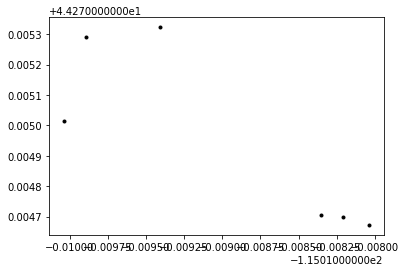

In [6]:
import matplotlib.pyplot as plt
plt.plot(coords.lon, coords.lat, 'k.') # plot the lon and lat as black dots
## you may need to run plt.show() to see the plot, depending on your python interface


Finally, you can create an obspy 'Inventory' object and write it as a stationXML file using this code:

In [7]:
import obspy, gemlog

## define the Gem instrument response; this is the same one posted on IRIS Nominal Response Library
## if you used a configuration file to set low gain (unusual), change the gain setting here
response = gemlog.get_gem_response(gain = 'high') 

## manually add elevation to 'coords'. raise an issue on github if you know an
## easy-to-install, cross-platform way to automate this!
coords = gemlog.summarize_gps('gps', station_info = 'station_info.txt', output_file = 'project_coords.csv')
coords['elevation'] = [1983, 1983, 1988, 1983, 1986, 1987] # from google earth

## create an inventory of all sensors used in this project--may cause warnings
inv = gemlog.make_gem_inventory('station_info.txt', coords, response)
inv.write('NM_inventory.xml', format='STATIONXML')

## write a kml file you can open in Google Earth or other GIS
## this only has station-level precision; locations are not given their own points
inv.write('NM_inventory.kml', format = 'KML')


1 of 6: 077
2 of 6: 088
3 of 6: 096
4 of 6: 103
5 of 6: 106
6 of 6: 109
Reading file station_info.txt
File has valid header, using that for column names
Reading file station_info.txt
File has valid header, using that for column names


When validating the stationXML file using the [IRIS stationXML Validator](https://github.com/iris-edu/StationXML-Validator/), it should pass with no errors but probably with common warnings related to response units case.
